In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [4]:
# TensorFlow and tf.keras
!pip3 install tensorflow==2.12.0rc0
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.1/230.1 MB 1.4 MB/s eta 0:00:0000:0100:04
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 2.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 2.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 2.5 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 2.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.3/409.3 kB 4.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 2.5 MB/s et

2023-09-05 12:51:43.045012: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.12.0-rc0


# Convolutional Neural Network using TensorFlow

Neural networks and other machine learning techniques can be used for lots of things.  One important subclass of problems is image recognition.  In this notebook, we will use a neural network to classify images of clothing.  We will use the Fashion MNIST dataset, which contains 70,000 grayscale images in 10 categories.  The images show individual articles of clothing at low resolution (28 by 28 pixels).  We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images.

The Fashion MNIST dataset is included in TensorFlow, so we can access it directly.  We will load the dataset and then show the first image in the training set.  The labels are integers, so we will also show the label for the first image.

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [21]:
print("Training images: ", train_images.shape)
print("Training labels: ", train_labels.shape)
print("Test images: ", test_images.shape)
print("Test labels: ", test_labels.shape)

Training images:  (60000, 28, 28)
Training labels:  (60000,)
Test images:  (10000, 28, 28)
Test labels:  (10000,)


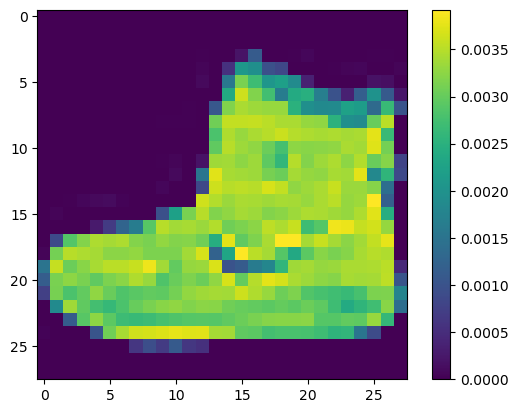

In [34]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Preprocess the data

The data must be preprocessed before training the network.  If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255.  We will scale these values to a range of 0 to 1 before feeding them to the neural network.  For this, we will divide the values by 255.  It is important that the training set and the testing set be preprocessed in the same way.

In [23]:
train_images = train_images / 255.0

test_images = test_images / 255.0

# Display the first 25 images from the training set and display the class name below each image.  Verify that the data is in the correct format and we are ready to build and train the network.

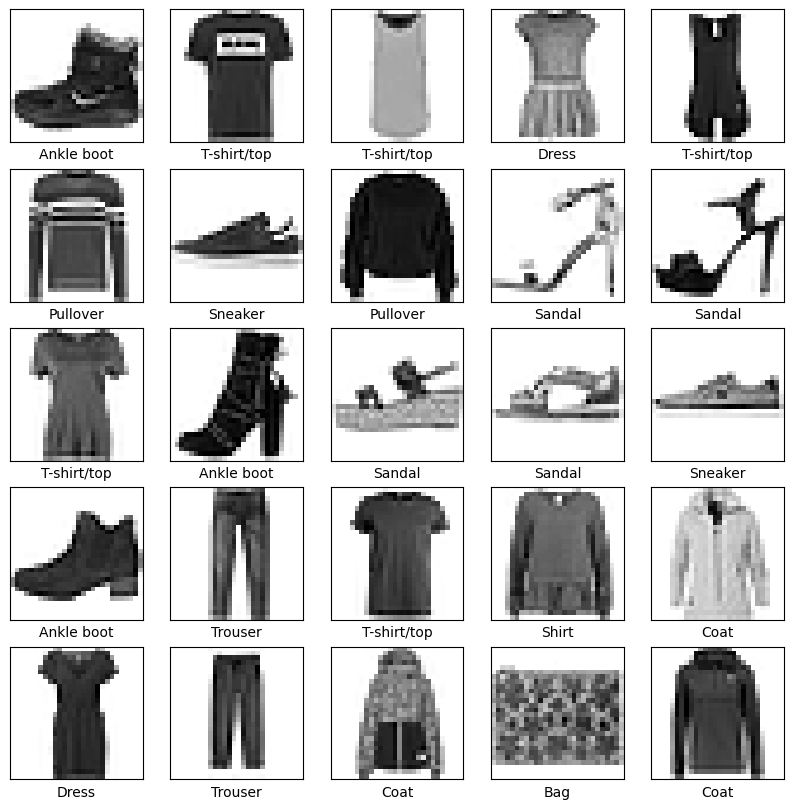

In [24]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

## Setup the layers

The basic building block of a neural network is the layer.  Layers extract representations from the data fed into them.  Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers.  Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels.  Think of this layer as unstacking rows of pixels in the image and lining them up.  This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers.  These are densely-connected, or fully-connected, neural layers.  The first Dense layer has 128 nodes (or neurons).  The second (and last) layer is a 10-node softmax layer that returns an array of 10 probability scores that sum to 1.  Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

The activation function relu effectively means that if X is greater than 0 return X, else return 0.  It only passes values of 0 or greater to the next layer in the network.  In other words, if the correlation is positive, then pass it on, otherwise, pass nothing.  This is a common activation function in neural networks.

The activation function—softmax—takes a set of values, and effectively picks the biggest one.  For example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05, 0.3], then the biggest value is the one at index 4, or the fifth element of the list.  The model picks this as the most likely class.  We will see this in more detail later.

In [25]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

## Compile the model

Before the model is ready for training, it needs a few more settings.  These are added during the model's compile step:

* Loss function —This measures how accurate the model is during training.  We want to minimize this function to "steer" the model in the right direction.  The following example uses sparse_categorical_crossentropy, which is used for integer labels.
* Optimizer —This is how the model is updated based on the data it sees and its loss function.  The following example uses adam, which is an optimization algorithm that is a good default for many problems.
* Metrics —Used to monitor the training and testing steps.  The following example uses accuracy, the fraction of the images that are correctly classified.

In [26]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the train_images and train_labels arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set—in this example, the test_images array.  We verify that the predictions match the labels from the test_labels array.
4. To start training, call the model.fit method—the model is "fit" to the training data.
5. As the model trains, the loss and accuracy metrics are displayed.  This model reaches an accuracy of about 0.88 (or 88%) on the training data.

An epoch is a full iteration over the training data.  For example, if we have 10,000 images in the training set and a batch size of 100, then the epoch is 100 iterations.  We can think of the epoch as a loop over all of the training data.  The number of epochs is a hyperparameter that we can tune.  We want to choose the number that is high enough to train the model well, but not so high that it overfits the training data.  In other words, we want to avoid memorizing the training data.

In [28]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4694 - accuracy: 0.8354
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4545 - accuracy: 0.8407
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4424 - accuracy: 0.8446
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4329 - accuracy: 0.8481
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4240 - accuracy: 0.8520
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4172 - accuracy: 0.8521
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4105 - accuracy: 0.8558
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4053 - accuracy: 0.8577
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3995 - accuracy: 0.8594
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.395

# Make predictions

Now that the model is trained, we can use it to make predictions about some images.

In [29]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 607us/step


# Define some functions to help us look at the results

In [30]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# How well did we do?  

Start by looking at the fraction of time that we correctly predicted the label for ankle boots.  This is the 9th element of the array.  We can see that we correctly predicted the label for 67% of the images in the test set.  We made mistakes on 33% of the images. We can also see that the model was confused by sandals and sneakers.

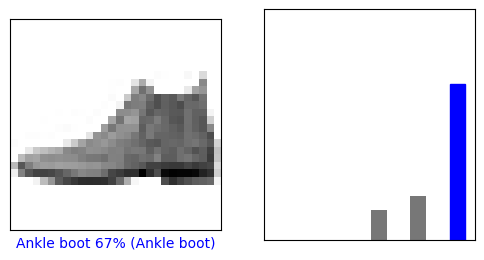

In [31]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

# Pullovers

Now, let's look at pullovers.  We can see that we correctly predicted the label for 94% of the images in the test set.  We made mistakes on 16% of the images.  We can also see that the model was confused by coats and shirts.  But, perhaps somewhat surprisingly, it was not confused by t-shirts.  Maybe that makes sense, since t-shirts are more likely to have short sleeves, while pullovers are more likely to have long sleeves.

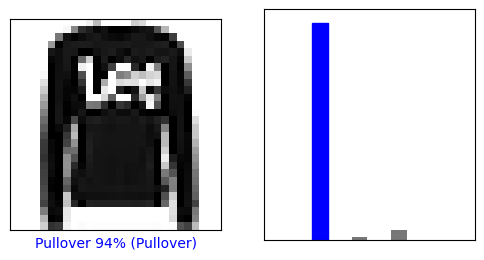

In [32]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

# Trousers

Finally, let's look at trousers.  We can see that we correctly predicted the label for 100% of the images in the test set.  I guess that makes sense, since trousers are pretty distinctive in this data set. 

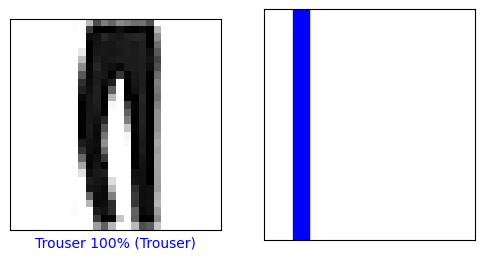

In [33]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()